In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Consumer_Complaints.csv")

In [3]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer Complaint,Company Public Response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date Sent to Company,Company Response to Consumer,Timely response?,Consumer disputed?,Complaint ID
0,3/12/14,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,3/17/14,Closed with explanation,Yes,No,759217
1,10/1/16,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10/5/16,Closed with explanation,Yes,No,2141773
2,10/17/16,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/16,Closed with explanation,Yes,No,2163100
3,6/8/14,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,6/10/14,Closed with explanation,Yes,Yes,885638
4,9/13/14,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,9/13/14,Closed with explanation,Yes,Yes,1027760


In [5]:
df.shape

(9999, 18)

In [6]:
col = ['Product', 'Consumer Complaint']
df= df[col]
df= df[pd.notnull(df['Consumer Complaint'])]

In [7]:
df.columns=['Product', 'Consumer_complaint']

In [8]:
df['category_id'] = df['Product'].factorize()[0]

In [10]:
cat_id_df = df[["Product", "category_id"]].drop_duplicates().sort_values('category_id')

In [11]:
cat_to_id = dict(cat_id_df.values)

In [12]:
id_to_cat = dict(cat_id_df[['category_id','Product']].values)

In [13]:
df.head()

,Product,Consumer_complaint,category_id
1,Credit reporting,I have outdated information on my credit repor...,0
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...,1
7,Credit reporting,An account on my credit report has a mistaken ...,0
12,Debt collection,This company refuses to provide me verificatio...,2
16,Debt collection,This complaint is in regards to Square Two Fin...,2


In [14]:
import matplotlib.pyplot as plt

In [15]:
fig = plt.figure(figsize= (8,6))

<Figure size 576x432 with 0 Axes>

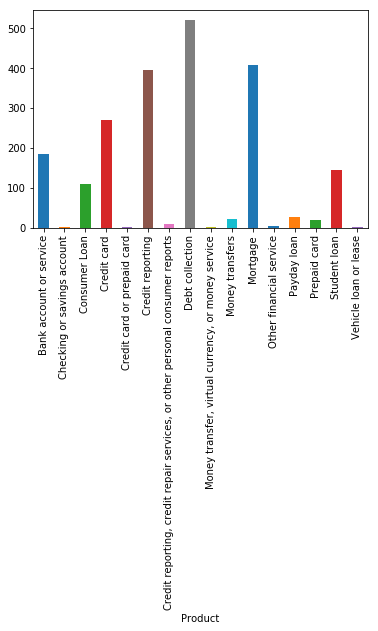

In [17]:
df.groupby('Product').Consumer_complaint.count().plot.bar(ylim=0)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
tfidf = TfidfVectorizer(sublinear_tf= True, #use a logarithmic form for frequency
                       min_df = 5, #minimum numbers of documents a word must be present in to be kept
                       norm= 'l2', #ensure all our feature vectors have a euclidian norm of 1
                       ngram_range= (1,2), #to indicate that we want to consider both unigrams and bigrams.
                       stop_words ='english') #to remove all common pronouns to reduce the number of noisy features

In [20]:
features = tfidf.fit_transform(df.Consumer_complaint).toarray()

In [21]:
labels = df.category_id
features.shape

(2114, 6081)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint'], df['Product'], random_state= 0)

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
count_vect = CountVectorizer()

In [45]:
from sklearn.feature_extraction.text import TfidfTransformer

In [46]:
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [47]:
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(X_train_tfidf, y_train)

In [48]:
print(clf.predict(count_vect.transform(['I have outdated information on my credit repor'])))

['Credit reporting']


In [90]:
y_pred = clf.predict(count_vect.transform(X_test))

In [91]:
from sklearn import metrics

In [92]:
print(metrics.classification_report(y_test,y_pred, labels= df.Product, target_names=df['Product'].unique()))

                                                                              precision    recall  f1-score   support

                                                            Credit reporting       0.70      0.87      0.77        91
                                                               Consumer Loan       0.36      0.43      0.39        21
                                                             Debt collection       0.70      0.87      0.77        91
                                                                    Mortgage       0.86      0.69      0.76       124
                                                                 Credit card       0.86      0.69      0.76       124
                                                     Other financial service       0.86      0.89      0.88       113
                                                     Bank account or service       0.86      0.89      0.88       113
                                                       

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1537: UserWarning: labels size, 2114, does not match size of target_names, 16
  .format(len(labels), len(target_names))
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
